In [ ]:
Author: Ishrak and Kobby

In [67]:
import pandas as pd
import numpy as np

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Core ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.naive_bayes import  BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report




In [70]:
# Load train & test sets
train_df = pd.read_csv("UNSW_NB15_MODELS/UNSW_NB15_training-set.csv")
test_df  = pd.read_csv("UNSW_NB15_MODELS/UNSW_NB15_testing-set.csv")

train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [71]:
# Separate
# features and target
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [72]:
# 1. Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.columns.difference(categorical_cols)

In [73]:
# 2. Preprocessor for BernoulliNB
preprocessor = ColumnTransformer([
    ('num_scale', StandardScaler(), numeric_cols),              # scale numeric
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


In [74]:

# 3. Full pipeline: scale → transform → binarize → BernoulliNB
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('binarize', Binarizer(threshold=0.0)),     # convert all values to 0/1
    ('classifier', BernoulliNB(alpha=0.5))       # smoothing improves performance
])

Train and predict

In [75]:

# Train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
# Evaluate
# performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [77]:
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.9838
Precision: 0.9840
Recall:    0.9838
F1 Score:  0.9838


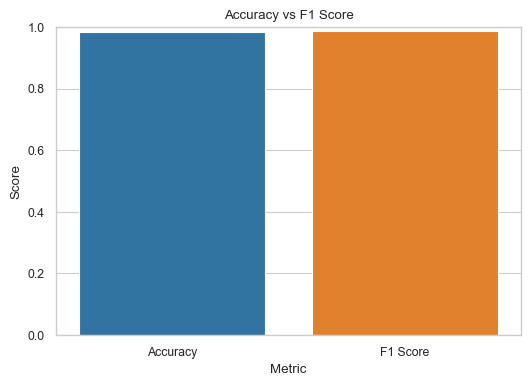

In [78]:
# Apply style
sns.set_style("whitegrid")
sns.set_context("paper")

# Compute metrics
accuracy = accuracy_score(test_df['label'], y_pred)
f1 = f1_score(test_df['label'], y_pred)

# Prepare DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score'],
    'Value': [accuracy, f1]
})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title("Accuracy vs F1 Score")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()
